In [39]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
import os
from sys import platform
from sklearn.linear_model import Ridge, Lasso # regularization
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier # DecisionTreeRegressor
from sklearn.svm import SVC 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [40]:
withbets = pd.read_csv("../coding-csv/merged_datasets.csv", index_col=[0])
withbets.sample()
data = withbets[["ID", "date", "home_team", "away_team"]]
withbets.drop(["ID", "date", "home_team", "away_team"], axis=1, inplace=True)
withbets.fillna(0, inplace=True)
# withbets.dropna(inplace=True)
withbets

,home_goals_offense,home_goals_defense,home_offense,home_in_game,home_defense,away_goals_offense,away_goals_defense,away_offense,away_in_game,away_defense,...,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA
0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,4.10,2.10,3.40,3.50,2.05,3.10,4.00,2.05,3.20,4.40
1,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,4.60,1.75,3.60,4.80,1.80,3.75,4.20,1.80,4.00,4.60
2,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,3.00,2.50,3.30,2.85,2.40,3.40,2.90,2.40,3.40,3.13
3,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,1.45,7.20,4.40,1.45,8.00,4.20,1.44,7.50,4.30,1.50
4,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,5.75,1.55,4.00,6.20,1.67,3.60,5.50,1.65,4.00,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2.1,1.0,0.86,0.65,0.56,0.9,1.4,0.55,0.59,0.51,...,8.75,1.37,4.80,8.75,1.33,4.75,8.50,1.36,4.75,9.50
2410,1.4,2.1,0.57,0.59,0.48,1.2,1.8,0.55,0.59,0.59,...,3.25,2.20,3.50,3.25,2.15,3.50,3.10,2.15,3.40,3.40
2411,1.7,1.3,0.59,0.55,0.59,1.4,1.3,0.53,0.59,0.56,...,4.50,1.77,3.65,4.70,1.70,3.60,4.75,1.75,3.60,5.00
2412,0.9,1.6,0.55,0.56,0.58,1.9,0.8,0.86,0.68,0.57,...,1.50,6.25,4.50,1.50,6.00,4.40,1.50,6.50,4.50,1.50


In [41]:
withbets = pd.concat([withbets.drop("result", axis=1), withbets["result"]], axis=1)
results = withbets[["result"]]

bets = withbets[["B365H", "B365D", "B365A"]]

scaler = StandardScaler()
# scaler = MinMaxScaler()

withbets = pd.DataFrame(scaler.fit_transform(withbets[withbets.columns[:-1]]), columns=withbets.columns[:-1])

withbets = pd.concat([withbets, results], axis=1)

In [42]:
withbets.drop(["BWH", "BWD", "BWA", "IWD", "IWH", "IWA", "WHH", "WHD", "WHA", "VCH", "VCD", "VCA"], axis=1, inplace=True)

In [43]:
withbets = withbets.iloc[10:]

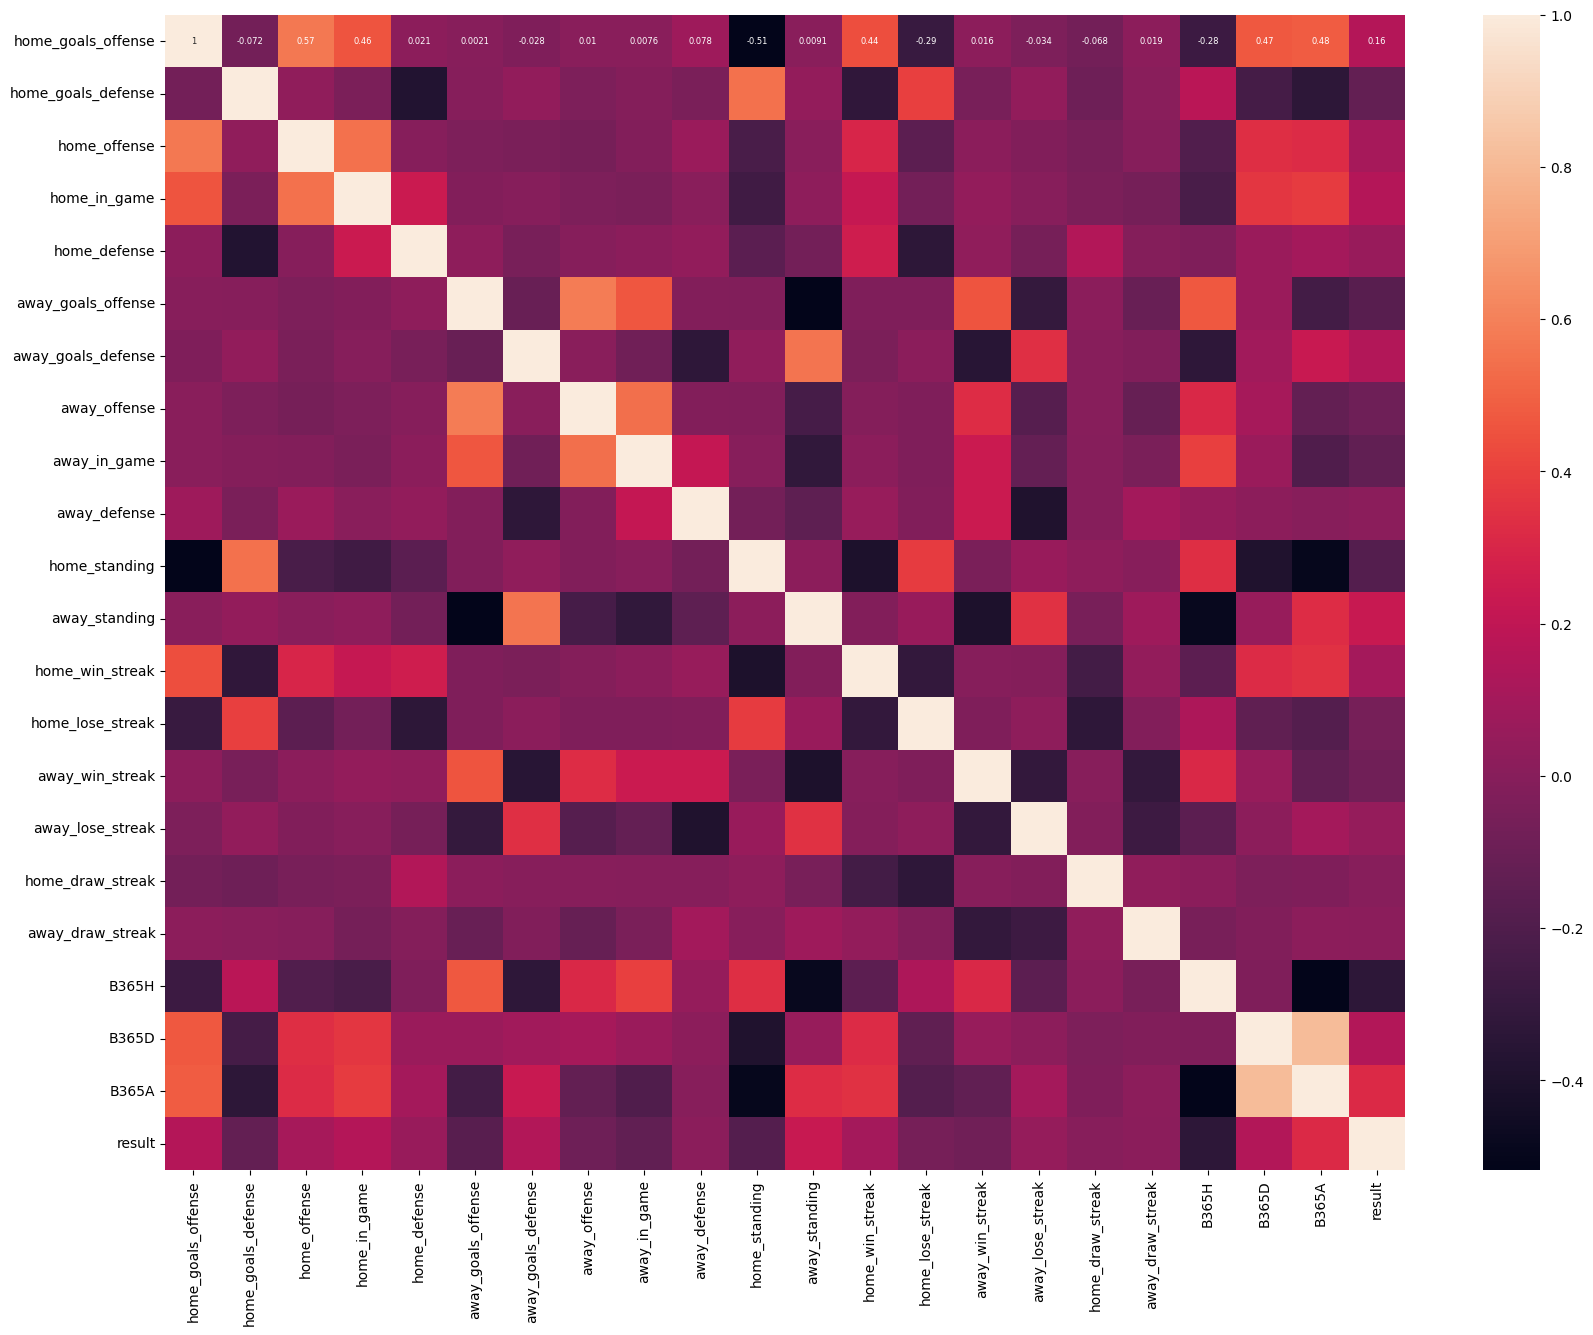

In [44]:
x = withbets.corr()

plt.subplots(figsize=(20,15))
sns.heatmap(x, annot=True, annot_kws={'size': 6});

In [45]:
X = withbets.iloc[:,:-1]
y = withbets['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
param_grid = {
    'n_estimators': [10, 50, 100]
}

In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [48]:
regressor = XGBRegressor()

In [49]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

In [50]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [51]:
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

y_pred = grid_search.predict(X_test)

In [52]:
model_filename = '../prediction-models/mymodel1.pkl'
joblib.dump(grid_search, model_filename)

['../prediction-models/mymodel1.pkl']

In [53]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
r2 = r2_score(y_pred, y_test)

In [54]:
r2

-3.3364336659354112

In [55]:
mse = mean_squared_error(y_test, y_pred)
mse

0.16695328947368424

In [56]:
X_test["pred"] = y_pred
X_test["real"] = y_test

sample = X_test["pred"].sample()
sample

964    0.845
Name: pred, dtype: float64

In [57]:
withbets.iloc[sample.index[0]]

home_goals_offense   -0.594770
home_goals_defense    0.032803
home_offense         -0.891964
home_in_game         -0.093602
home_defense          0.771142
away_goals_offense    0.769297
away_goals_defense    0.806428
away_offense          0.151248
away_in_game          0.066734
away_defense          0.790357
home_standing         1.559858
away_standing        -0.679381
home_win_streak      -0.485158
home_lose_streak     -0.647497
away_win_streak       0.240097
away_lose_streak     -0.519335
home_draw_streak      0.883364
away_draw_streak     -0.516251
B365H                 0.154522
B365D                -0.634499
B365A                -0.550682
result                1.000000
Name: 974, dtype: float64

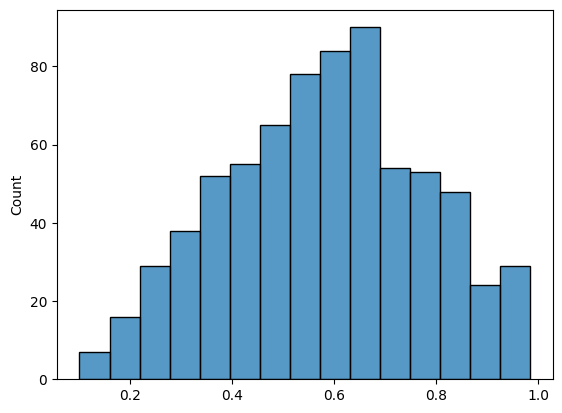

In [58]:
sns.histplot(y_pred);

In [59]:
resulter = X_test[["pred", "real"]]

margin = 0.8

wins = resulter[resulter["pred"] > margin]

losses = resulter[resulter["pred"] < (1 - margin)]


print(f"Nº wins: {len(wins[wins['real']==1]) + len(losses[losses['real']==0])}")
print(f"Nº: {len(wins) + len(losses)}")
print(f"Percentage: {round(((len(wins[wins['real']==1]) + len(losses[losses['real']==0])) / (len(wins) + len(losses)))*100, 2)}%")
print("-----")
print(f"Nº: {len(wins) + len(losses)}")
print(f"Total matches: {len(resulter)}")
print(f"Percentage of matches betted: {round(( (len(wins) + len(losses)) / len(resulter)) * 100, 2)}%")

Nº wins: 84
Nº: 121
Percentage: 69.42%
-----
Nº: 121
Total matches: 722
Percentage of matches betted: 16.76%


In [60]:
loaded_model = joblib.load(model_filename)

In [61]:
to_predict = withbets.drop(["result"], axis=1)

In [62]:
all_pred = loaded_model.predict(to_predict)

withbets["predicted"] = all_pred

In [63]:
all_test = withbets["result"]

r2 = r2_score(y_pred, y_test)

In [64]:
r2

-3.3364336659354112

In [65]:
resulter = withbets[["predicted", "result"]]

wins = resulter[resulter["predicted"] > margin]

losses = resulter[resulter["predicted"] < (1 - margin)]

print(f"Nº wins: {len(wins[wins['result']==1]) + len(losses[losses['result']==0])}")
print(f"Nº: {len(wins) + len(losses)}")
print(f"Percentage win: {round(((len(wins[wins['result']==1]) + len(losses[losses['result']==0])) / (len(wins) + len(losses)))*100, 2)}%")
print("-----")
print(f"Nº: {len(wins) + len(losses)}")
print(f"Total matches: {len(withbets)}")
print(f"Percentage of matches betted: {round(( (len(wins) + len(losses)) / len(withbets)) * 100, 2)}%")

Nº wins: 1008
Nº: 1045
Percentage win: 96.46%
-----
Nº: 1045
Total matches: 2404
Percentage of matches betted: 43.47%


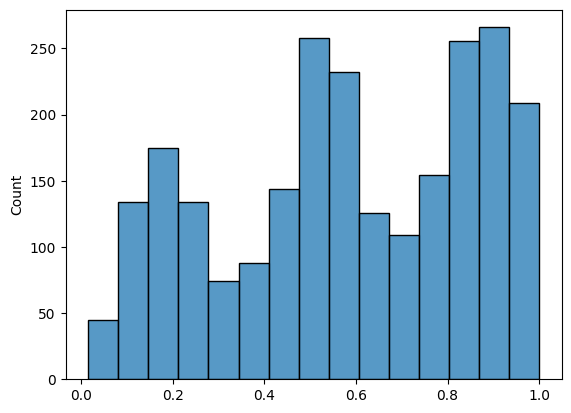

In [66]:
sns.histplot(all_pred);

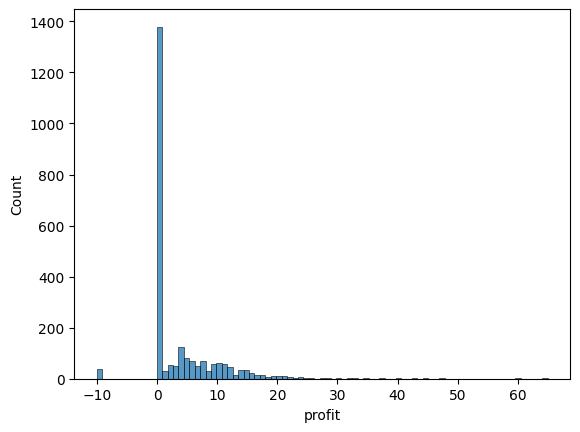

In [67]:
checker = pd.concat([bets, resulter], axis=1)

bet = 10

checker['profit'] = np.where((checker['predicted'] > margin) & (checker['result'] == 1), (checker['B365H'] * bet) - bet, np.where((checker['predicted'] > margin) & (checker['result'] != 1), -10, np.where((checker['predicted'] < ( 1 - margin)) & (checker['result'] == 0), (checker['B365A'] * bet) - bet, np.where((checker['predicted'] < ( 1 - margin)) & (checker['result'] != 0), -10, 0))))

sns.histplot(checker["profit"]);

In [68]:
checker["profit"].sum()

9060.100000000002

In [69]:
checker.iloc[2298]

B365H        3.300
B365D        3.100
B365A        2.350
predicted    0.445
result       1.000
profit       0.000
Name: 2298, dtype: float64

In [70]:
xx = pd.concat([data, withbets[withbets.columns[-2:]], checker], axis=1)
xx = xx[xx["date"]>"2023-07-07"]
xx = xx[["ID", "predicted", "result", "profit"]]

In [71]:
xx["profit"].sum()

492.90000000000003

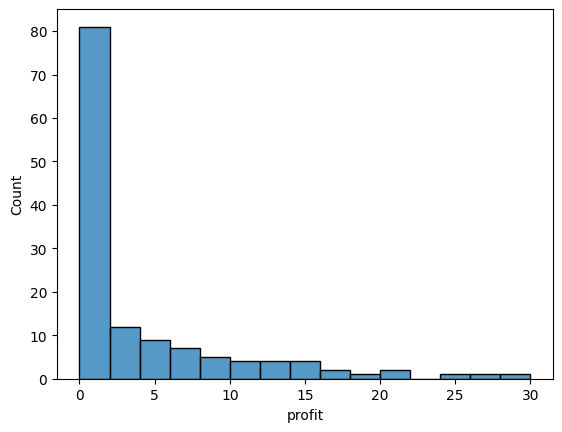

In [72]:
sns.histplot(xx["profit"]);

In [73]:
xx.head(50)

,ID,predicted,predicted,result,result,profit
2280,2023-08-11-Almería-Rayo Vallecano,0.270,0.270,0.0,0.0,0.0
2281,2023-08-11-Sevilla-Valencia,0.250,0.250,0.0,0.0,0.0
2282,2023-08-12-Real Sociedad-Girona,0.770,0.770,0.5,0.5,0.0
2283,2023-08-12-Las Palmas-Mallorca,0.625,0.625,0.5,0.5,0.0
2284,2023-08-12-Athletic Club-Real Madrid,0.085,0.085,0.0,0.0,11.5
2285,2023-08-13-Celta Vigo-Osasuna,0.270,0.270,0.0,0.0,0.0
2286,2023-08-13-Villarreal-Real Betis,0.250,0.250,0.0,0.0,0.0
2287,2023-08-13-Getafe-Barcelona,0.445,0.445,0.5,0.5,0.0
2288,2023-08-14-Cádiz-Alavés,0.825,0.825,1.0,1.0,12.0
2289,2023-08-14-Atlético Madrid-Granada,0.855,0.855,1.0,1.0,3.0
